# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [1]:
# Necessary Imports
import numpy as np
import pandas as pd
from scipy import stats

In [5]:
# Load Datasets

# Basketball Dataset
nba_data = pd.read_csv('data/nba.games.stats.csv')

In [6]:
nba_data['Date'] = pd.to_datetime(nba_data['Date'])

In [14]:
one_season = nba_data.loc[(nba_data['Date'] >= '2016-10-25') & (nba_data['Date'] <= '2017-04-12')]
one_season = one_season.drop(columns = ['Date', 'Unnamed: 0'])
one_season['WINorLOSS'] = one_season['WINorLOSS'].eq('W').mul(1)
one_season.head()

,Team,Game,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
4920,ATL,1,Home,WAS,1,114,99,44,88,0.500,...,13,18,0.722,12,40,25,14,4,19,20
4921,ATL,2,Away,PHI,1,104,72,42,85,0.494,...,11,15,0.733,4,39,16,9,5,20,20
4922,ATL,3,Home,SAC,1,106,95,33,79,0.418,...,13,19,0.684,6,38,26,10,6,19,34
4923,ATL,4,Home,LAL,0,116,123,41,85,0.482,...,18,20,0.900,11,42,24,11,9,15,25
4924,ATL,5,Away,WAS,0,92,95,32,83,0.386,...,28,35,0.800,11,46,13,7,3,19,23


In [15]:
teams_ha = one_season.groupby(['Team', 'Home']).sum()

In [18]:
teams_ha

Game  WINorLOSS  TeamPoints  OpponentPoints  FieldGoals  \
Team Home                                                            
ATL  Away  1685         20        4116            4190        1523   
     Home  1718         23        4343            4339        1600   
BOS  Away  1607         23        4367            4318        1566   
     Home  1796         30        4490            4323        1602   
BRK  Away  1745          7        4393            4718        1568   
     Home  1658         13        4280            4507        1534   
CHI  Away  1677         16        4182            4272        1586   
     Home  1726         25        4253            4128        1583   
CHO  Away  1721         14        4231            4347        1529   
     Home  1682         22        4370            4238        1564   
CLE  Away  1834         20        4426            4500        1589   
     Home  1569         31        4622            4287        1686   
DAL  Away  1673         12        3955            4256        1481   
     Home  1730         21        4074            4013        1487   
DEN  Away  1689         18        4492            4580        1650   
     Home  1714         22        4669            4539        1727   
DET  Away  1672         13        4087            4345        1609   
     Home  1731         24        4222            4056        1660   
GSW  Away  1635         31        4631            4331        1701   
     Home  1768         36        4872            4218        1831   
HOU  Away  1578         25        4653            4543        1636   
     Home  1825         30        4805            4442        1669   
IND  Away  1739         13        4235            4467        1568   
     Home  1664         29        4383            4169        1653   
LAC  Away  1659         22        4416            4428        1606   
     Home  1744         29        4495            4131        1636   
LAL  Away  1611          9        4165            4665        1564   
     Home  1792         17        4410            4474        1660   
MEM  Away  1722         19        4170            4217        1525   
     Home  1681         24        4069            3982        1459   
MIA  Away  1664         18        4095            4170        1560   
     Home  1739         23        4365            4203        1642   
MIL  Away  1822         19        4149            4267        1569   
     Home  1581         23        4348            4245        1613   
MIN  Away  1775         11        4287            4497        1618   
     Home  1628         20        4370            4251        1617   
NOP  Away  1780         13        4143            4338        1568   
     Home  1623         21        4413            4390        1642   
NYK  Away  1695         12        4256            4492        1595   
     Home  1708         19        4300            4365        1649   
OKC  Away  1757         19        4250            4432        1561   
     Home  1646         28        4491            4247        1676   
ORL  Away  1671         13        4179            4571        1597   
     Home  1732         16        4109            4256        1542   
PHI  Away  1866         11        4202            4523        1559   
     Home  1537         17        4198            4344        1529   
PHO  Away  1618          9        4334            4704        1610   
     Home  1785         15        4497            4589        1660   
POR  Away  1598         16        4344            4512        1577   
     Home  1805         25        4507            4382        1666   
SAC  Away  1633         15        4123            4365        1538   
     Home  1770         17        4307            4383        1567   
SAS  Away  1597         30        4306            4051        1610   
     Home  1806         31        4331            3996        1612   
TOR  Away  1748         23        4215            4186        1562   
     Home  1655      

In [16]:
win_percentages = teams_ha['WINorLOSS']/41

Text(0, 0.5, 'Win %')

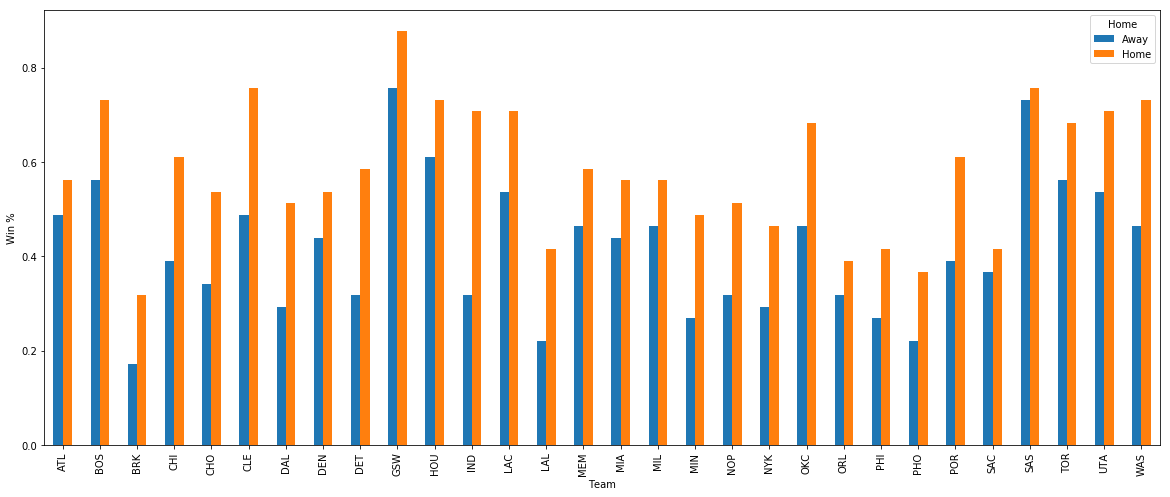

In [17]:
win_percent_team = win_percentages.unstack().plot.bar(figsize=(20,8))
win_percent_team.set_ylabel("Win %")

In [8]:
team_scores = one_season[['Team','WINorLOSS', 'Game', 'Home','TeamPoints', 'OpponentPoints']]
team_scores = team_scores[team_scores['WINorLOSS'] == 1]
team_scores['ScoreDiff'] = team_scores['TeamPoints'].sub(team_scores['OpponentPoints'], axis=0)

In [9]:
ha_win_score_diff = team_scores.groupby(['Team','Home']).mean()['ScoreDiff']

Text(0, 0.5, 'Avg Score Differential in Wins')

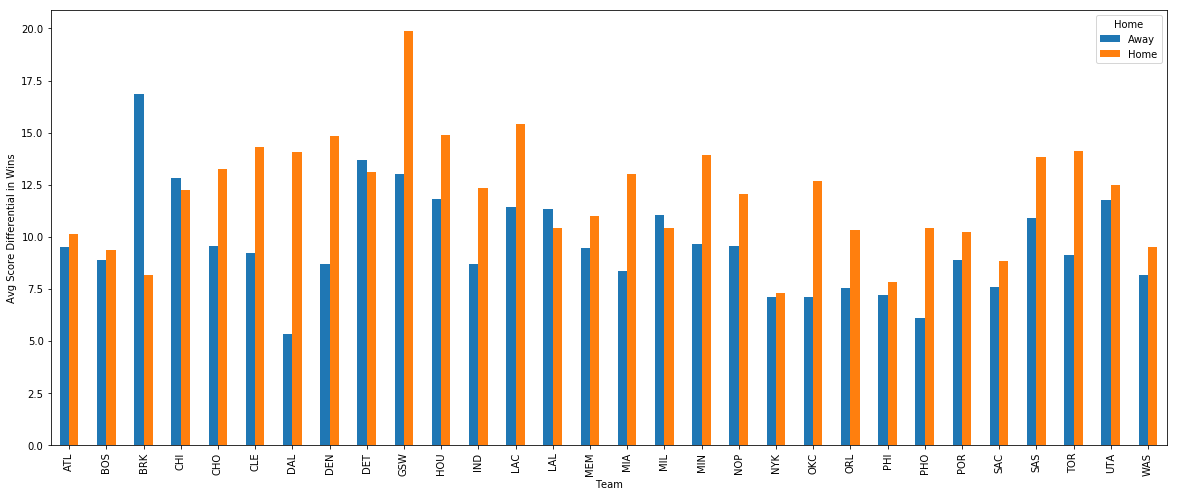

In [10]:
score_diff = ha_win_score_diff.unstack().plot.bar(figsize=(20,8))
score_diff.set_ylabel("Avg Score Differential in Wins")

In [14]:
df_ha = ha_win_score_diff.unstack()
len(df_ha.loc[df_ha['Home'] > df_ha['Away']])

25

In [19]:
home_greater = df_ha.loc[df_ha['Home'] > df_ha['Away']]
home_greater['Home'].mean() - home_greater['Away'].mean()

3.25724297549729

In [25]:
stats.ttest_ind(home_greater['Home'], home_greater['Away'], equal_var = False)

Ttest_indResult(statistic=4.860888174640401, pvalue=1.7247253869154674e-05)

There are 25 teams that have a greater score differential in home wins than away wins. The average score differential for these 25 teams is 3.257 points. Running a t-test at the 0.05 confidence level gives a p-value lower than 0.05, so we can reject the null hypothesis stating that there is no significant difference between the means of home and away wins. It is safe to say that the score differential difference is statistically significant.